## Hypothesis Testing Assignment

In [54]:
#Importing necessary packages
import pandas as pd
import numpy as np
# package with hypothesis tests
import scipy.stats as st

### Data

You can download the data from [**here**](https://drive.google.com/file/d/0Bz9_0VdXvv9bUUNlUTVrMF9VcVU/view?usp=sharing&resourcekey=0-16O9Fc5eaJH99-M7AHqHOg). The data contains results of all NBA games from seasons 2013/2014 to 2015/2016.

In [55]:
df = pd.read_csv("nba_games_2013_2015.csv", delimiter =";")
df

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22015,1610612750,MIN,Minnesota Timberwolves,21501226,2016-04-13,MIN vs. NOP,W,240,144,...,0.826,5,38,43,41,14,8,13,20,35.0
1,22015,1610612749,MIL,Milwaukee Bucks,21501225,2016-04-13,MIL vs. IND,L,240,92,...,0.846,7,36,43,23,8,3,15,15,-5.0
2,22015,1610612738,BOS,Boston Celtics,21501217,2016-04-13,BOS vs. MIA,W,240,98,...,0.864,10,29,39,20,7,3,7,20,10.0
3,22015,1610612747,LAL,Los Angeles Lakers,21501228,2016-04-13,LAL vs. UTA,W,239,101,...,0.867,8,39,47,19,6,3,13,17,5.0
4,22015,1610612739,CLE,Cleveland Cavaliers,21501220,2016-04-13,CLE vs. DET,L,265,110,...,0.733,8,35,43,21,4,7,10,23,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,22013,1610612753,ORL,Orlando Magic,21300001,2013-10-29,ORL @ IND,L,241,87,...,0.600,13,26,39,17,10,6,17,26,-10.0
7376,22013,1610612748,MIA,Miami Heat,21300002,2013-10-29,MIA vs. CHI,W,239,107,...,0.759,5,35,40,26,10,7,18,21,12.0
7377,22013,1610612747,LAL,Los Angeles Lakers,21300003,2013-10-29,LAL vs. LAC,W,240,116,...,0.643,18,34,52,23,8,6,19,23,13.0
7378,22013,1610612741,CHI,Chicago Bulls,21300002,2013-10-29,CHI @ MIA,L,238,95,...,0.783,11,30,41,23,11,4,18,27,-12.0


--------------
### Task 1
Split the data into **3** separate dataframes for each NBA season!

In [56]:
df_13 = df[(df['SEASON_ID'] == 22013)]
df_14 = df[(df['SEASON_ID'] == 22014)]
df_15 = df[(df['SEASON_ID'] == 22015)]

---------------
### Task 2
Test the hypothesis that the offensive productions stats of the Cleveland Cavaliers and Golden State Warriors (the teams that met in the finals that year) were from the same distribution in the 2015/2016 season.

Offensive production refers to two variables: **PTS (Points)** and **FG_PCT (Field Goal Percentage)**. We will need to do two separate hypothesis tests, one for each variable.

In [ ]:
#t-test indep samples test
# scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)

In [8]:
#df for each team for the 15 season
df_CLE = df_15[df_15["TEAM_ABBREVIATION"] == "CLE"]
df_GSW = df_15[df_15["TEAM_ABBREVIATION"] == "GSW"]

#pts for each team
CLE_PTS = df_CLE["PTS"]
GSW_PTS = df_GSW["PTS"]

#FG for each team
CLE_FG = df_CLE["FG_PCT"]
GSW_FG = df_GSW["FG_PCT"]

In [9]:
# independent t tests for points
st.ttest_ind(CLE_PTS, GSW_PTS)

Ttest_indResult(statistic=-5.973920595717936, pvalue=1.4233420547764935e-08)

In [41]:
# p-val = 0.05 usually
# we can reject the null hyp bc p-val < 0.05
# since our p-val is reaaaaly small the distributions for both teams are different
# if the p-val is close to 0.05 then we can see if the distributions are similar (maybe visually)

In [10]:
# independent t tests for field goal percentage
st.ttest_ind(CLE_FG, GSW_FG)

Ttest_indResult(statistic=-3.13195297595825, pvalue=0.00206097581047554)

In [45]:
# 0.002 is still v small. not close enough to 0.05 to draw any conclusions about the similarity of distributions. still different dists.
#we can reject null!!!

In [16]:
# Function to interperet the results for us
def indttest_results(x1, x2, nullhyp, alpha):
    ttest = st.ttest_ind(x1, x2)
    print(f'Null hypothesis tested: {nullhyp}')
    if ttest[1] < alpha:
        print(f'P-val = {ttest[1]}\n Result: Reject the null hypothesis; samples are significantly different.\n')
    else:
        print(f'P-val = {ttest[1]}\n Result: Fail to reject the null hypothesis.\n')
        
indttest_results(CLE_FG, GSW_FG, 'The PTS are the same distribution for CLE and GSW for the season', 0.05)
indttest_results(CLE_PTS, GSW_PTS, 'The FGP are the same distribution for CLE and GSW for the season', 0.05)
    

Null hypothesis tested: The PTS are the same distribution for CLE and GSW for the season
P-val = 0.00206097581047554
 Result: Reject the null hypothesis; samples are significantly different.

Null hypothesis tested: The FGP are the same distribution for CLE and GSW for the season
P-val = 1.4233420547764935e-08
 Result: Reject the null hypothesis; samples are significantly different.



-----------------
### Task 3
Test the hypothesis that the number of points (PTS) scored by Cleveland Cavaliers changed significantly after the head coach changed in the 2015/2016 season.

- **Coach Blatt was fired on 24th of Jan, 2016**. 

Use the data from seasons 2014/2015 and 2015/2016 - those are years when Cleveland was coached by Blatt. 

**We have two possible solutions to try here:**
- Take the same amount of games from before and after and try t-test.
- Take all the games from before and after and look for the right test to compare two samples with different sizes. (You will need to go through the scipy documentation or google to figure out what kind of test is required.)

In [50]:
df_CLE = df_15[df_15["TEAM_ABBREVIATION"] == "CLE"]

#by date:
df_after = df_CLE[(df_CLE['GAME_DATE'] > '2016-01-24')]
df_before = df_CLE[(df_CLE['GAME_DATE'] <= '2016-01-24')]
df_before_all = df[(df["TEAM_ABBREVIATION"] == "CLE")&(df['GAME_DATE'] < '2016-01-24')] #all seasons
df_before_all

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
1143,22015,1610612739,CLE,Cleveland Cavaliers,21500659,2016-01-23,CLE vs. CHI,L,241,83,...,0.409,16,32,48,17,5,5,4,18,-13.0
1176,22015,1610612739,CLE,Cleveland Cavaliers,21500640,2016-01-21,CLE vs. LAC,W,239,115,...,0.750,14,33,47,29,5,2,13,31,13.0
1195,22015,1610612739,CLE,Cleveland Cavaliers,21500631,2016-01-20,CLE @ BKN,W,240,91,...,0.700,6,39,45,15,6,3,13,13,13.0
1218,22015,1610612739,CLE,Cleveland Cavaliers,21500622,2016-01-18,CLE vs. GSW,L,240,98,...,0.680,8,28,36,22,3,4,15,25,-34.0
1270,22015,1610612739,CLE,Cleveland Cavaliers,21500601,2016-01-15,CLE @ HOU,W,241,91,...,0.652,17,32,49,19,10,6,14,24,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,22013,1610612739,CLE,Cleveland Cavaliers,21300066,2013-11-06,CLE @ MIL,L,240,104,...,0.727,12,27,39,20,10,2,9,21,-5.0
7282,22013,1610612739,CLE,Cleveland Cavaliers,21300047,2013-11-04,CLE vs. MIN,W,240,93,...,0.909,11,38,49,22,10,12,23,24,1.0
7303,22013,1610612739,CLE,Cleveland Cavaliers,21300033,2013-11-02,CLE @ IND,L,240,74,...,0.867,6,31,37,11,15,1,16,25,-15.0
7316,22013,1610612739,CLE,Cleveland Cavaliers,21300020,2013-11-01,CLE @ CHA,L,241,84,...,0.727,11,31,42,14,9,1,17,29,-6.0


In [36]:
#st.ttest_ind(a, b) <- need to make the samples the same for the ttest
df_after.PTS.array

<PandasArray>
[110, 109, 102, 109, 109, 112, 110, 107, 100, 107,  95, 113, 124, 101, 109,
  99,  85, 114, 120, 120, 103, 120, 108, 100,  99,  97, 114,  88, 115, 106,
 120, 120,  99, 103,  97, 111, 117, 114, 115, 114]
Length: 40, dtype: int64

In [37]:
df_before.PTS.array

<PandasArray>
[ 83, 115,  91,  98,  91,  95, 110,  95, 125, 121, 122, 104,  93, 101,  76,
  83,  91, 108, 104,  89, 111, 105,  84, 108,  85,  90,  95,  99, 117, 109,
 115,  99, 105,  90, 118, 101, 108,  96, 107, 102, 106,  95]
Length: 42, dtype: int64

In [41]:
# len of before is 42, after is 40. Need to remove 2 rows of data from before
df_before_40 = df_before.iloc[:-1,:].iloc[:-1,:]
df_before_40.PTS.array

<PandasArray>
[ 83, 115,  91,  98,  91,  95, 110,  95, 125, 121, 122, 104,  93, 101,  76,
  83,  91, 108, 104,  89, 111, 105,  84, 108,  85,  90,  95,  99, 117, 109,
 115,  99, 105,  90, 118, 101, 108,  96, 107, 102]
Length: 40, dtype: int64

In [43]:
st.ttest_ind(df_before_40["PTS"], df_after["PTS"])

Ttest_indResult(statistic=-2.911228614180665, pvalue=0.00469146960112461)

In [51]:
df_before_all.PTS.array

<PandasArray>
[ 83, 115,  91,  98,  91,  95, 110,  95, 125, 121,
 ...
  80,  95,  81, 127,  79, 104,  93,  74,  84,  98]
Length: 206, dtype: int64

In [46]:
#The other method:
st.kruskal(df_before["PTS"], df_after["PTS"])

KruskalResult(statistic=8.070296682814282, pvalue=0.004499674880811304)

In [62]:
#The null Hyp is that the pts before and after are of the same distribution
#since p-val is < 0.05 we reject null
#***********this doesn't really make sense. You could say the null is that they are the same or different.
#it's significant if the p-val is less than 0.05

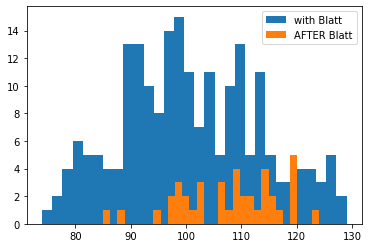

In [57]:
# Plot the data
import matplotlib.pyplot as plt
plt.hist(df_before_all["PTS"],bins=30)
plt.hist(df_after["PTS"],bins=30)
plt.legend(('with Blatt','AFTER Blatt'))
plt.show()

----------------


### Task 4
Download [**the similar dataset**](https://drive.google.com/file/d/0Bz9_0VdXvv9bRHhuRTI1aXBQcTA/view?usp=sharing&resourcekey=0-jGIaWyk0bXyECNSzB3x38w) with scores from playoff games in 2016.

In [59]:
df_playoffs16 = pd.read_csv("nba_playoff_games_2016.csv", delimiter =";")
df_playoffs16

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42015,1610612739,CLE,Cleveland Cavaliers,41500407,2016-06-19,CLE @ GSW,W,241,93,...,0.840,9,39,48,17,7,6,11,15,4.0
1,42015,1610612744,GSW,Golden State Warriors,41500407,2016-06-19,GSW vs. CLE,L,239,89,...,0.769,7,32,39,22,7,5,10,23,-4.0
2,42015,1610612744,GSW,Golden State Warriors,41500406,2016-06-16,GSW @ CLE,L,238,101,...,0.690,9,26,35,19,5,3,14,25,-14.0
3,42015,1610612739,CLE,Cleveland Cavaliers,41500406,2016-06-16,CLE vs. GSW,W,240,115,...,0.781,8,37,45,24,12,7,10,25,14.0
4,42015,1610612739,CLE,Cleveland Cavaliers,41500405,2016-06-13,CLE @ GSW,W,241,112,...,0.609,8,33,41,15,11,9,16,22,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,42015,1610612760,OKC,Oklahoma City Thunder,41500161,2016-04-16,OKC vs. DAL,W,243,108,...,0.857,14,42,56,23,7,6,18,25,38.0
168,42015,1610612737,ATL,Atlanta Hawks,41500131,2016-04-16,ATL vs. BOS,W,238,102,...,0.771,13,40,53,23,4,9,11,20,1.0
169,42015,1610612745,HOU,Houston Rockets,41500141,2016-04-16,HOU @ GSW,L,240,78,...,0.500,13,38,51,16,10,6,24,28,-26.0
170,42015,1610612742,DAL,Dallas Mavericks,41500161,2016-04-16,DAL @ OKC,L,238,70,...,0.615,9,24,33,16,5,0,12,25,-38.0


------------
### Task 5
Test the hypothesis that **number of blocks (BLK)** are from the same distribution in both the NBA playoffs and in the NBA regular season for 2015/2016 seaon for the **Toronto Raptors**. 

- We will be working with two samples with different sizes again.

In [ ]:
#use krusal test ex) st.kruskal(df_before["PTS"], df_after["PTS"])

In [60]:
#results only for TOR
df_playoffs_TOR = df_playoffs16[df_playoffs16["TEAM_ABBREVIATION"] == "TOR"] # 20 rows
df_15_TOR = df_15[df_15["TEAM_ABBREVIATION"] == "TOR"] # 82 rows

In [61]:
st.kruskal(df_playoffs_TOR["BLK"], df_15_TOR["BLK"])

KruskalResult(statistic=7.483641456983013, pvalue=0.006226202691250736)

In [101]:
#p-val is less than 0.05, so we can reject the null. They are not of the same dist.

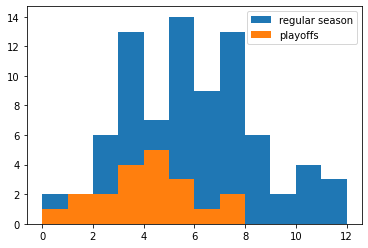

In [62]:
bins = range(max(df_15_TOR["BLK"])-min(df_15_TOR["BLK"]))
plt.hist(df_15_TOR["BLK"],bins=bins)
plt.hist(df_playoffs_TOR["BLK"],bins=bins)
plt.legend(('regular season','playoffs'))
plt.show()


-----------------
### Task 6
Test the hypothesis that the number of points (PTS) scored by Cleveland Cavaliers is equally distributed for all 3 seasons. 

- In this case, we need a hypothesis test that compares more than 2 distributions at the same. (You will need to go through the scipy documentation or google to figure out what kind of test is required.)

In [ ]:
#any p-val of greater than 0.05 means that it has equal dist. 
#one way anova - f_oneway(performance1, performance2, performance)

In [102]:
# df_CLE is for the 15 season
df_CLE_14 = df_14[df_14["TEAM_ABBREVIATION"] == "CLE"]
df_CLE_13 = df_13[df_13["TEAM_ABBREVIATION"] == "CLE"]

In [108]:
st.f_oneway(df_CLE["PTS"], df_CLE_14["PTS"], df_CLE_13["PTS"])

F_onewayResult(statistic=5.9200250318080885, pvalue=0.003087727119983984)

In [109]:
# p-val is less than 0.05 so we can reject the null hyp and say that they are not all equally distributed.

#### Follow Up
**Between which seasons can we see the significant difference?**

+ Unfortunatelly, this is not the output of an ANOVA test and further tests are needed to be run.
+ Note: Lebron James came back to the Cleveland Caveliers prior to season 2014/2015. We can use this fact to interpret our results correctly.

In [ ]:
# do a ttest for each of the season combos

In [110]:
#13 & 14
st.ttest_ind(df_CLE_14["PTS"], df_CLE_13["PTS"])

Ttest_indResult(statistic=2.508958204796911, pvalue=0.013091680534336523)

In [115]:
#p-val is less than 0.05 so we can say that the 13 and 14 seasons are NOT equally distributed
0.05 > 0.013091680534336523

True

In [112]:
#13 & 15
st.ttest_ind(df_CLE["PTS"], df_CLE_13["PTS"])

Ttest_indResult(statistic=3.339057501969076, pvalue=0.001043164899206325)

In [116]:
#p-val is less than 0.05 so we can say that the 13 and 15 seasons are NOT equally distributed
0.05 > 0.001043164899206325

True

In [111]:
#14 & 15
st.ttest_ind(df_CLE["PTS"], df_CLE_14["PTS"])

Ttest_indResult(statistic=0.6442093460555935, pvalue=0.5203507617734474)

In [118]:
#p-val is greater than 0.05 so we can say that the 15 and 14 seasons are equally distributed
0.05 > 0.5203507617734474

False

In [121]:
#labron was not on the team for 14/15 and 15/16 and this is why the 13/14 season is different. 